In [1]:
#Import pandas for dataframes as pd
import pandas as pd

#Import datetime module for manipulating dates and times as dt
import datetime as dt

#Import request to allow for connections to APIs
import requests

#Import json package
import json

#Import matplotlib and seaborn for visualisations
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#Obtaining data from clinicaltrials.gov API (in two parts due to API restrictions)
url_1 = 'https://clinicaltrials.gov/api/query/study_fields?expr=AREA[StudyType]Interventional+AREA[OverallStatus]Completed+AREA[HealthyVolunteers]No+AREA[PrimaryCompletionDate]RANGE[01/01/2013,%20MAX]&min_rnk=1&max_rnk=1000&fmt=JSON&fields=NCTId,BriefTitle,LeadSponsorClass,EnrollmentCount,StartDate,PrimaryCompletionDate'
url_2 = 'https://clinicaltrials.gov/api/query/study_fields?expr=AREA[StudyType]Interventional+AREA[OverallStatus]Completed+AREA[HealthyVolunteers]No+AREA[PrimaryCompletionDate]RANGE[01/01/2013,%20MAX]&min_rnk=1001&max_rnk=2000&fmt=JSON&fields=NCTId,BriefTitle,LeadSponsorClass,EnrollmentCount,StartDate,PrimaryCompletionDate'
r_1 = requests.get(url_1)
r_2 = requests.get(url_2)
json_data_1 = r_1.json()
json_data_2 = r_2.json()

In [3]:
#Checking format and keys of imported data above
print(type(json_data_1))
print(json_data_1.keys())

<class 'dict'>
dict_keys(['StudyFieldsResponse'])


In [4]:
#Further investigating structure of imported data 
print(type(json_data_1['StudyFieldsResponse']))
print(json_data_1['StudyFieldsResponse'].keys())

<class 'dict'>
dict_keys(['APIVrs', 'DataVrs', 'Expression', 'NStudiesAvail', 'NStudiesFound', 'MinRank', 'MaxRank', 'NStudiesReturned', 'FieldList', 'StudyFields'])


In [5]:
#Investigating data important under 'StudyFields' in imported data and printing first row.
print(type(json_data_1['StudyFieldsResponse']['StudyFields']))
print(json_data_1['StudyFieldsResponse']['StudyFields'][0])

<class 'list'>
{'Rank': 1, 'NCTId': ['NCT05921630'], 'BriefTitle': ['Patient Compliance With the Spirometry Protocol'], 'LeadSponsorClass': ['OTHER'], 'EnrollmentCount': ['450'], 'StartDate': ['December 1, 2021'], 'PrimaryCompletionDate': ['September 1, 2022']}


In [6]:
#Append the two imported datasets, i.e. the lists located under 'StudyFields' key in json_data_1 and json_data_2.
clinical_trials_list = json_data_1['StudyFieldsResponse']['StudyFields'] + json_data_2['StudyFieldsResponse']['StudyFields']
print(clinical_trials_list[0])
print(clinical_trials_list[-1])

{'Rank': 1, 'NCTId': ['NCT05921630'], 'BriefTitle': ['Patient Compliance With the Spirometry Protocol'], 'LeadSponsorClass': ['OTHER'], 'EnrollmentCount': ['450'], 'StartDate': ['December 1, 2021'], 'PrimaryCompletionDate': ['September 1, 2022']}
{'Rank': 2000, 'NCTId': ['NCT05410678'], 'BriefTitle': ['Safety And Efficacy Results of Percutaneous Renal Stent Implantation in Ectatic and Aneurysmatic Coronary Arteries'], 'LeadSponsorClass': ['OTHER'], 'EnrollmentCount': ['63'], 'StartDate': ['June 1, 2015'], 'PrimaryCompletionDate': ['January 1, 2022']}


In [7]:
#Creating a dataframe to work with.
clinical_trials_list_df = pd.DataFrame(clinical_trials_list)

In [8]:
#Importing flat csv file of fake company data on the number of products sold per clinical trial.
product_purchases = pd.read_csv("trials_purchases.csv")

In [9]:
#Creating a dataframe for the company purchases data.
product_purchases_df = pd.DataFrame(product_purchases)
product_purchases.head()

,NCTId,Site-FacingProducts,Patient-FacingProducts,TotalProducts
0,['NCT05732545'],2,1,3
1,['NCT05453305'],2,2,4
2,['NCT05464043'],4,2,6
3,['NCT05583994'],4,1,5
4,['NCT05450497'],4,0,4


# Cleaning and Merging the Two DataFrames

In [10]:
#checking shape of the clinical_trials_list dataframe.
clinical_trials_list_df.shape

(2000, 7)

In [11]:
#Checking the clinical trials list for duplicate trials using the unique identifier NCTId.
duplicate_trials = clinical_trials_list_df[clinical_trials_list_df.duplicated(["NCTId"])]
print(duplicate_trials)

Empty DataFrame
Columns: [Rank, NCTId, BriefTitle, LeadSponsorClass, EnrollmentCount, StartDate, PrimaryCompletionDate]
Index: []


In [12]:
#Look at first 5 rows of clinical_trials_list_df data to get a better sense of the dataset.
clinical_trials_list_df.head()

,Rank,NCTId,BriefTitle,LeadSponsorClass,EnrollmentCount,StartDate,PrimaryCompletionDate
0,1,[NCT05921630],[Patient Compliance With the Spirometry Protocol],[OTHER],[450],"[December 1, 2021]","[September 1, 2022]"
1,2,[NCT05921058],[The Effects of Mesenchymal Stem Cell Secretom...,[OTHER],[15],"[August 1, 2022]","[December 30, 2022]"
2,3,[NCT05920746],[Treatment of Rheumatoid Hand With Magnetother...,[OTHER],[72],"[March 1, 2021]","[November 1, 2022]"
3,4,[NCT05920525],"[Pain, Discomfort, and Acceptance During Using...",[OTHER],[40],"[March 15, 2021]","[September 15, 2022]"
4,5,[NCT05920434],[The Effect of Foot Reflexology and Foot Bath ...,[OTHER],[90],"[July 19, 2020]","[August 21, 2020]"


In [13]:
#Dropping the rank column as this is of no interest.
clinical_trials_list_df.drop('Rank', inplace=True, axis=1)
clinical_trials_list_df.head()

,NCTId,BriefTitle,LeadSponsorClass,EnrollmentCount,StartDate,PrimaryCompletionDate
0,[NCT05921630],[Patient Compliance With the Spirometry Protocol],[OTHER],[450],"[December 1, 2021]","[September 1, 2022]"
1,[NCT05921058],[The Effects of Mesenchymal Stem Cell Secretom...,[OTHER],[15],"[August 1, 2022]","[December 30, 2022]"
2,[NCT05920746],[Treatment of Rheumatoid Hand With Magnetother...,[OTHER],[72],"[March 1, 2021]","[November 1, 2022]"
3,[NCT05920525],"[Pain, Discomfort, and Acceptance During Using...",[OTHER],[40],"[March 15, 2021]","[September 15, 2022]"
4,[NCT05920434],[The Effect of Foot Reflexology and Foot Bath ...,[OTHER],[90],"[July 19, 2020]","[August 21, 2020]"


In [14]:
#Finding out number of data entries, columns, data types, and assessing quality of dataset (no. blank cells)
clinical_trials_list_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   NCTId                  2000 non-null   object
 1   BriefTitle             2000 non-null   object
 2   LeadSponsorClass       2000 non-null   object
 3   EnrollmentCount        2000 non-null   object
 4   StartDate              2000 non-null   object
 5   PrimaryCompletionDate  2000 non-null   object
dtypes: object(6)
memory usage: 93.9+ KB


In [15]:
#Confirming that there is no missing data. 
clinical_trials_list_df.isna().any()

NCTId                    False
BriefTitle               False
LeadSponsorClass         False
EnrollmentCount          False
StartDate                False
PrimaryCompletionDate    False
dtype: bool

In [16]:
#Function that can be called to convert objects to strings and clean up the string objects in a dataframe by removing unnwanted characters.
def clean_df_strings(self, *col_name):
    """When passed a dataframe, it converts the listed columns to strings and
    removes any square brackets or single quotes from those strings."""
    for name in col_name:
        self[name] = self[name].astype('string')
        self[name] = self[name].str.replace("[","", regex=True).str.replace("]","", regex=True).str.strip("'")

In [17]:
#Removing unwanted characters from the clinical trials list strings.
clean_df_strings(clinical_trials_list_df, "NCTId", "BriefTitle", "LeadSponsorClass", "EnrollmentCount", "StartDate", "PrimaryCompletionDate")
clinical_trials_list_df.head()

,NCTId,BriefTitle,LeadSponsorClass,EnrollmentCount,StartDate,PrimaryCompletionDate
0,NCT05921630,Patient Compliance With the Spirometry Protocol,OTHER,450,"December 1, 2021","September 1, 2022"
1,NCT05921058,The Effects of Mesenchymal Stem Cell Secretome...,OTHER,15,"August 1, 2022","December 30, 2022"
2,NCT05920746,Treatment of Rheumatoid Hand With Magnetotherapy,OTHER,72,"March 1, 2021","November 1, 2022"
3,NCT05920525,"Pain, Discomfort, and Acceptance During Using ...",OTHER,40,"March 15, 2021","September 15, 2022"
4,NCT05920434,The Effect of Foot Reflexology and Foot Bath o...,OTHER,90,"July 19, 2020","August 21, 2020"


In [18]:
#Converting Enrollment to an integer and checking the type.
clinical_trials_list_df['EnrollmentCount'] = clinical_trials_list_df['EnrollmentCount'].astype(int)
clinical_trials_list_df.dtypes

NCTId                    string
BriefTitle               string
LeadSponsorClass         string
EnrollmentCount           int32
StartDate                string
PrimaryCompletionDate    string
dtype: object

In [19]:
#Converting the the start and completion dates to datetime.
clinical_trials_list_df["StartDate"] = pd.to_datetime(clinical_trials_list_df["StartDate"])
clinical_trials_list_df["PrimaryCompletionDate"] = pd.to_datetime(clinical_trials_list_df["PrimaryCompletionDate"])
print(clinical_trials_list_df.dtypes)

NCTId                            string
BriefTitle                       string
LeadSponsorClass                 string
EnrollmentCount                   int32
StartDate                datetime64[ns]
PrimaryCompletionDate    datetime64[ns]
dtype: object


In [20]:
#Adding column to capture length of the study as number of days.
clinical_trials_list_df["StudyLength"] = (clinical_trials_list_df["PrimaryCompletionDate"] - clinical_trials_list_df["StartDate"]).dt.days

In [21]:
#Sorting the dataframe by the length of the study.
clinical_trials_list_df = clinical_trials_list_df.sort_values(by="StudyLength")
clinical_trials_list_df.head()

,NCTId,BriefTitle,LeadSponsorClass,EnrollmentCount,StartDate,PrimaryCompletionDate,StudyLength
1564,NCT05490316,A Study of IBI353 (Orismilast) in Chinese Heal...,INDUSTRY,20,2022-11-30,2022-11-30,0
980,NCT05629780,Temporal Changes of Lactate in CLASSIC Patients,OTHER,784,2022-09-29,2022-09-29,0
695,NCT05706090,Effect of Neurostimulator Usage on Block Success,OTHER_GOV,60,2020-02-01,2020-02-01,0
618,NCT05725551,"The Effect of Shotblocker, Finger Puppet And B...",OTHER,148,2022-10-01,2022-10-01,0
1818,NCT05444985,Postoperative Analgesic Effects of Bilateral E...,OTHER,80,2023-05-09,2023-05-09,0


In [22]:
#Checking the shape and datatypes of the product purchases dataframe.
print(product_purchases_df.shape)
product_purchases_df.dtypes

(95, 4)


NCTId                     object
Site-FacingProducts        int64
Patient-FacingProducts     int64
TotalProducts              int64
dtype: object

In [23]:
#Converting NCTId to string and removing any unwanted characters.
clean_df_strings(product_purchases_df, "NCTId")
product_purchases_df.head()

,NCTId,Site-FacingProducts,Patient-FacingProducts,TotalProducts
0,NCT05732545,2,1,3
1,NCT05453305,2,2,4
2,NCT05464043,4,2,6
3,NCT05583994,4,1,5
4,NCT05450497,4,0,4


In [24]:
#Merging the two dataframes to create a single dataset
trials_df = product_purchases.merge(clinical_trials_list_df, how="left", on="NCTId")
trials_df.head()

,NCTId,Site-FacingProducts,Patient-FacingProducts,TotalProducts,BriefTitle,LeadSponsorClass,EnrollmentCount,StartDate,PrimaryCompletionDate,StudyLength
0,NCT05732545,2,1,3,Application of Enteral Nutrition Program in Pa...,OTHER,218,2022-01-01,2022-10-01,273
1,NCT05453305,2,2,4,"""Venopuncture in Pediatric Emergency Departmen...",OTHER,220,2021-06-01,2022-06-30,394
2,NCT05464043,4,2,6,Hyperglycemia and (Pre)Diabetes in Pediatric R...,OTHER,250,2019-06-20,2019-12-31,194
3,NCT05583994,4,1,5,"""Optimising Community Resources and Support to...",OTHER,264,2022-07-13,2023-03-31,261
4,NCT05450497,4,0,4,Effect of Sedative Agent on Reducing the Frequ...,OTHER,356,2017-07-01,2019-07-01,730


In [25]:
#Checking the shape of the new dataframe
trials_df.shape

(95, 10)

In [ ]:
#Add a grouping - maybe group by sponsor type here.

# Descriptive Statistics

In [ ]:
#Use numpy functions in here as well.

## Quantitative Variables

In [26]:
#Descriptive statistics for integer data.
trials_df.describe(percentiles=[0.05, 0.25, 0.75, 0.95])

,Site-FacingProducts,Patient-FacingProducts,TotalProducts,EnrollmentCount,StudyLength
count,95.000000,95.000000,95.000000,95.000000,95.000000
mean,3.652632,1.484211,5.157895,162.021053,399.789474
std,1.173904,1.303540,1.632879,222.715923,367.693700
min,0.000000,0.000000,3.000000,6.000000,57.000000
5%,2.000000,0.000000,3.000000,12.000000,109.600000
25%,3.000000,0.000000,4.000000,32.500000,182.500000
50%,4.000000,2.000000,5.000000,64.000000,273.000000
75%,5.000000,3.000000,7.000000,241.000000,415.000000
95%,5.000000,3.000000,8.000000,458.000000,1113.300000
max,5.000000,4.000000,9.000000,1359.000000,1961.000000


In [27]:
#Getting modes of numerical variables
print(f"Site-Facing Products: {trials_df['Site-FacingProducts'].mode()}")
print(f"Patient-Facing Products: {trials_df['Patient-FacingProducts'].mode()}")
print(f"Total Products: {trials_df['TotalProducts'].mode()}")
print(f"EnrollmentCount Mode: {trials_df['EnrollmentCount'].mode()}")
print(f"StudyLength Mode: {trials_df['StudyLength'].mode()}")

Site-Facing Products: 0    4
Name: Site-FacingProducts, dtype: int64
Patient-Facing Products: 0    0
Name: Patient-FacingProducts, dtype: int64
Total Products: 0    4
Name: TotalProducts, dtype: int64
EnrollmentCount Mode: 0     60
1    100
Name: EnrollmentCount, dtype: int32
StudyLength Mode: 0    174
Name: StudyLength, dtype: int64


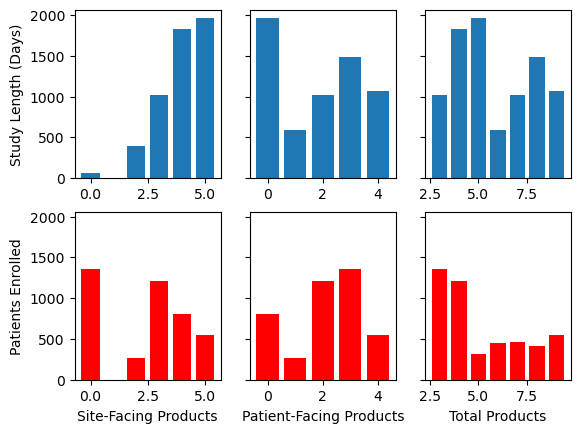

In [47]:
#Plotting bat charts to assess potential relationships.
fig, ax = plt.subplots(2,3, sharey=True)
ax[0,0].bar(trials_df["Site-FacingProducts"], trials_df["StudyLength"])
ax[0,1].bar(trials_df["Patient-FacingProducts"], trials_df["StudyLength"])
ax[0,2].bar(trials_df["TotalProducts"], trials_df["StudyLength"])
ax[0,0].set_ylabel("Study Length (Days)")
ax[1,0].bar(trials_df["Site-FacingProducts"], trials_df["EnrollmentCount"], color="red")
ax[1,1].bar(trials_df["Patient-FacingProducts"], trials_df["EnrollmentCount"], color="red")
ax[1,2].bar(trials_df["TotalProducts"], trials_df["EnrollmentCount"], color="red")
ax[1,0].set_ylabel("Patients Enrolled")
ax[1,0].set_xlabel("Site-Facing Products")
ax[1,1].set_xlabel("Patient-Facing Products")
ax[1,2].set_xlabel("Total Products")
plt.show()

## Categorical Variables

In [61]:
#Exploring types of sponsors in dataset.
trials_df["LeadSponsorClass"].value_counts()

INDUSTRY    88
OTHER        6
NIH          1
Name: LeadSponsorClass, dtype: Int64

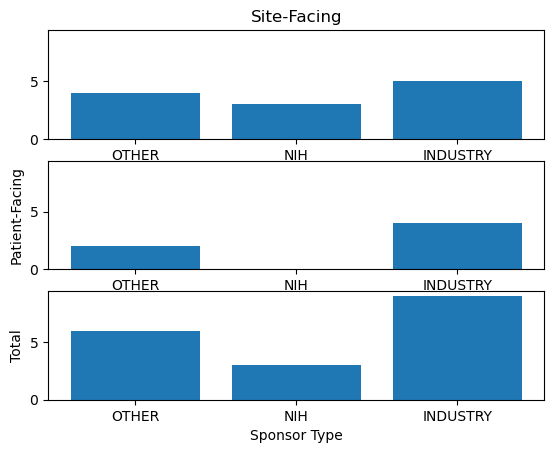

In [62]:
#Examining categorical variable, Sponsor Type, against products sold to assess relationships.
fig, ax = plt.subplots(3,1, sharey=True)
ax[0].bar(trials_df["LeadSponsorClass"], trials_df["Site-FacingProducts"])
ax[1].bar(trials_df["LeadSponsorClass"], trials_df["Patient-FacingProducts"])
ax[2].bar(trials_df["LeadSponsorClass"], trials_df["TotalProducts"])
ax[0].set_title("Site-Facing")
ax[1].set_ylabel("Patient-Facing")
ax[2].set_ylabel("Total")
ax[2].set_xlabel("Sponsor Type")
plt.show()